<a href="https://colab.research.google.com/github/kisaaga/ml_exercising/blob/master/cnn_digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digit Recognition using Convolutional Neural Network

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import platform

In [0]:
mnist_data = tf.keras.datasets.mnist
train, test = mnist_data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train, y_train = train
X_test, y_test = test

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We see that, image size = 28 x 28

Train data size = 60,000

Test data size = 10,000

Example drawing of an image

Some digits in the datatset:



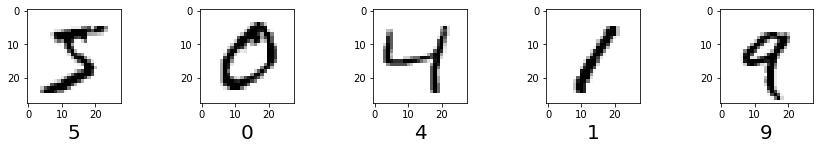

In [0]:
print('Some digits in the datatset:\n')
plt.figure(figsize=(15,10))
plt.xticks([])
plt.yticks([])
plt.subplot(5, 5, 1)
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.xlabel(y_train[0], {'size': 20})
plt.subplot(5, 5, 2)
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.xlabel(y_train[1], {'size': 20})
plt.subplot(5, 5, 3)
plt.imshow(X_train[2], cmap=plt.cm.binary)
plt.xlabel(y_train[2], {'size': 20})
plt.subplot(5, 5, 4)
plt.imshow(X_train[3], cmap=plt.cm.binary)
plt.xlabel(y_train[3], {'size': 20})
plt.subplot(5, 5, 5)
plt.imshow(X_train[4], cmap=plt.cm.binary)
plt.xlabel(y_train[4], {'size': 20})
plt.show()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
model = Sequential()

model.add(Conv2D(
    input_shape=(28, 28, 1),
    kernel_size=5,
    filters=8,
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(Conv2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(Flatten())

model.add(Dense(
    units=128,
    activation='relu'
));

model.add(Dropout(0.2))

model.add(Dense(
    units=10,
    activation='softmax',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [0]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
training_history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 1.5637 - accuracy: 0.8378 - val_loss: 0.2063 - val_accuracy: 0.9446
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2062 - accuracy: 0.9394 - val_loss: 0.1160 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1473 - accuracy: 0.9579 - val_loss: 0.1140 - val_accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1152 - accuracy: 0.9660 - val_loss: 0.0740 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0942 - accuracy: 0.9733 - val_loss: 0.0576 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0834 - accuracy: 0.9767 - val_loss: 0.0653 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0772 - accuracy: 0.9778 - val_loss: 0.0655 -

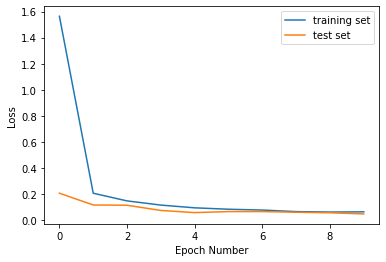

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

##Evaluating the Model

In [0]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0299 - accuracy: 0.9906


In [0]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.029896678403019905
Training accuracy:  0.9906333088874817


In [0]:
validation_loss, validation_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0475 - accuracy: 0.9867


In [0]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04749665409326553
Validation accuracy:  0.9866999983787537


Saving the model:

In [0]:
model_name = 'cnn_dig_recog.h5'
model.save(model_name, save_format='h5')

In [0]:
loaded_model = tf.keras.models.load_model(model_name)

In [0]:
prediction = loaded_model.predict(X_test)
pd.DataFrame(prediction)

,0,1,2,3,4,5,6,7,8,9
0,8.327863e-21,5.579035e-10,5.294920e-08,2.284180e-09,6.310535e-11,3.197511e-15,3.408720e-24,1.000000e+00,1.589753e-12,1.093798e-09
1,2.729155e-19,6.040607e-14,1.000000e+00,1.178692e-16,6.948323e-21,1.539567e-27,3.081532e-16,1.795800e-12,3.536597e-22,8.398071e-23
2,1.508319e-14,9.999998e-01,8.875729e-12,2.254077e-14,2.492974e-08,1.977226e-13,1.400867e-11,1.788254e-07,1.481595e-08,3.916479e-10
3,9.999985e-01,2.303715e-18,3.191196e-10,7.387664e-15,5.417070e-14,8.479593e-13,1.568836e-06,3.110544e-13,7.002119e-12,1.386858e-10
4,5.377885e-13,2.021620e-10,1.163019e-07,2.972782e-14,9.996006e-01,1.422218e-12,2.169556e-14,3.925261e-11,1.482408e-08,3.993543e-04
...,...,...,...,...,...,...,...,...,...,...
9995,9.447169e-24,1.364602e-12,9.999996e-01,3.290113e-14,1.934882e-21,4.786362e-27,8.509514e-24,3.004671e-07,1.825826e-21,4.240878e-23
9996,9.103831e-21,6.801298e-13,1.557953e-11,1.000000e+00,9.522388e-25,1.019134e-08,5.845913e-16,2.013212e-12,1.102786e-14,7.294611e-17
9997,1.034949e-29,6.108519e-16,1.749627e-15,1.048145e-19,1.000000e+00,3.894344e-20,1.233394e-23,1.394514e-15,5.650100e-17,2.528788e-11
9998,3.277754e-27,2.224998e-29,3.365770e-24,6.870508e-16,2.159863e-18,1.000000e+00,3.602405e-21,4.189051e-19,5.526113e-14,9.673501e-11


In [0]:
prediction = np.argmax(prediction, axis=1)

In [0]:
prediction.shape

(10000,)

In [0]:
pd.DataFrame(prediction)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5
